In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from lifelines import KaplanMeierFitter
#import pydotplus

## Survival Analysis of Recent Loans
We want to try different models to predict loans that are issued since 2014

In [2]:
df1 = pd.read_excel('2014.xlsx',sheetname='Sheet1')
df2 = pd.read_excel('2015.xlsx',sheetname='Sheet1')
df3 = pd.read_excel('2016_Q1.xlsx',sheetname='Sheet1')
df4 = pd.read_excel('2016_Q2.xlsx',sheetname='Sheet1')
df5 = pd.read_excel('2016_Q3.xlsx',sheetname='Sheet1')
df6 = pd.read_excel('2016_Q4.xlsx',sheetname='Sheet1')
df7 = pd.read_excel('2017_Q1.xlsx',sheetname='Sheet1')
df8 = pd.read_excel('2017_Q2.xlsx',sheetname='Sheet1')
df9 = pd.read_excel('2017_Q3.xlsx',sheetname='Sheet1')


In [3]:
date_before_36 = datetime.date(2014,10,1)
date_before_60 = datetime.date(2012,10,1)
df1 = df1[((df1.term.str.contains('36')) & (df1.issue_d > date_before_36))
                | (df1.term.str.contains('60'))]

In [4]:
data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],join='inner')

data = data[['id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate',
         'installment','grade','sub_grade','emp_title','emp_length',
         'home_ownership','annual_inc','verification_status','issue_d',
         'loan_status','purpose','title','zip_code','addr_state','dti',
        'delinq_2yrs','earliest_cr_line','open_acc','pub_rec','last_pymnt_d',
        'last_pymnt_amnt','last_fico_range_high','last_fico_range_low','application_type',
             'revol_bal','revol_util']]

data.dropna(subset=['annual_inc','loan_status','issue_d','last_pymnt_d','loan_amnt',
                          'int_rate','earliest_cr_line','open_acc','pub_rec','delinq_2yrs',
                          'grade','last_fico_range_high','last_fico_range_low','installment',
                         'funded_amnt','dti','funded_amnt_inv','revol_bal']
            ,inplace=True)

print(data.shape)

(1152963, 32)


## Feature Extraction
Now we want to use the following set of features for prediction model.
loan_amnt, funded amnt (investor), term (category), int_rate, installment, grade (category), emp_length (category), home_ownership (category), annual_inc, verification_status (category), purpose (category), dti, delinq_2yrs, earliest_cr_line (up to issue_d), open_acc, pub_rec, fico_high, fico_low

In [11]:
# create labels for the dataset
data['label'] = (data.loan_status.str.contains('Charged Off') | 
                data.loan_status.str.contains('Default') | 
                data.loan_status.str.contains('Late'))
data['cr_hist'] = (data.issue_d - data.earliest_cr_line) / np.timedelta64(1, 'M')
data.label = data.label.astype(int)
data['duration'] = (data.last_pymnt_d - data.issue_d) / np.timedelta64(1, 'M')

data_36 = data[data.term.str.contains('36')]
data_60 = data[data.term.str.contains('60')]

In [18]:
data_early_36 = data_36[data_36.label == 0]
data_early_36.set_value(index=(data_early_36.duration < 36), col='label',value=1)

/Users/jeol/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_d,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,application_type,revol_bal,revol_util,label,cr_hist,duration
4,37822187,9600,9600,9600.0,36 months,0.1366,326.53,C,C3,Admin Specialist,...,2015-04-01,9338.58,724,720,Individual,16388,0.594,1,264.974640,3.975441
6,37741884,2500,2500,2500.0,36 months,0.1199,83.03,B,B5,Manufacturing Engineer,...,2015-06-01,2294.26,784,780,Individual,22908,0.943,1,157.999138,5.979589
7,37642222,5250,5250,5250.0,36 months,0.1144,172.98,B,B4,Store Manager,...,2015-05-01,43.40,764,760,Individual,4448,0.202,1,67.023964,4.961087
11,37682226,17000,17000,17000.0,36 months,0.1366,578.22,C,C3,Deputy sheriff,...,2016-05-01,10888.01,694,690,Individual,5063,0.464,1,166.968521,16.985975
14,36520573,3000,3000,3000.0,36 months,0.1049,97.50,B,B3,Respiratory Therapist,...,2017-02-01,1117.63,674,670,Individual,4936,0.426,1,234.025339,26.053923
15,37742129,6000,6000,6000.0,36 months,0.1049,194.99,B,B3,Assistant manager,...,2017-04-01,578.30,669,665,Individual,49626,0.826,1,305.024744,27.992361
16,37742142,2000,2000,2000.0,36 months,0.1499,69.33,C,C5,practice plan associate,...,2015-05-01,1897.69,599,595,Individual,9544,0.624,1,218.977802,4.961087
17,37854423,2000,2000,2000.0,36 months,0.1599,70.31,D,D2,Student Services Coordinator,...,2016-06-01,1255.43,574,570,Individual,4533,0.201,1,251.996961,18.004476
18,37832099,4000,4000,4000.0,36 months,0.1599,140.61,D,D2,Accounting clerk,...,2017-02-01,1606.90,589,585,Individual,5697,0.655,1,153.038050,26.053923
19,37822018,2000,2000,2000.0,36 months,0.1431,68.66,C,C4,Sales Rep,...,2017-10-01,68.66,669,665,Individual,2227,0.742,1,57.956016,34.004805


In [22]:
data_early_60 = data_60[data_60.label == 0]
data_early_60.set_value(index=(data_early_60.duration < 36), col='label',value=1)

/Users/jeol/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_d,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,application_type,revol_bal,revol_util,label,cr_hist,duration
1,38098114,15000,15000,15000.0,60 months,0.1239,336.64,C,C1,MANAGEMENT,...,2016-06-01,12017.81,689,685,Individual,138008,0.290,1,244.013224,18.004476
2,37842129,21425,21425,21425.0,60 months,0.1559,516.36,D,D1,Programming Analysis Supervisor,...,2016-05-01,17813.19,704,700,Individual,16374,0.762,1,136.019220,16.985975
3,37612354,12800,12800,12800.0,60 months,0.1714,319.08,D,D4,Senior Sales Professional,...,2017-11-01,319.08,654,650,Individual,5753,1.009,1,169.991170,35.023306
8,37712169,21075,21075,21075.0,60 months,0.2199,581.95,E,E5,Paralegal,...,2017-10-01,581.95,709,705,Individual,15955,0.886,1,325.000513,34.004805
10,37854444,16000,16000,16000.0,60 months,0.1144,351.40,B,B4,Foreign Service Officer,...,2016-09-01,4935.54,669,665,Individual,7253,0.604,1,132.996571,21.027126
20,37622029,15000,15000,15000.0,60 months,0.2099,405.72,E,E4,Appraiser,...,2017-10-01,405.72,709,705,Individual,12486,0.575,1,108.979651,34.004805
23,37752109,13550,13550,13550.0,60 months,0.1999,358.92,E,E3,nurse,...,2017-10-01,358.92,674,670,Individual,2492,0.519,1,89.036736,34.004805
27,37692106,28000,28000,28000.0,60 months,0.1049,601.70,B,B3,Humana Cares Manager,...,2015-12-01,24652.44,709,705,Individual,14684,0.352,1,244.013224,11.992033
42,37612142,20000,20000,20000.0,60 months,0.1431,468.59,C,C4,Risk Management Program Coordinator,...,2017-10-01,468.59,709,705,Individual,14761,0.379,1,171.995318,34.004805
43,37751772,17600,17600,17600.0,60 months,0.0949,369.55,B,B2,High Pressure Plant Tender,...,2016-09-01,13002.49,799,795,Individual,22901,0.350,1,398.989712,21.027126


In [20]:
kmf = KaplanMeierFitter()
kmf.fit(data_early_36.duration,data_early_36.label)

<lifelines.KaplanMeierFitter: fitted with 706864 observations, 68 censored>

Populating the interactive namespace from numpy and matplotlib


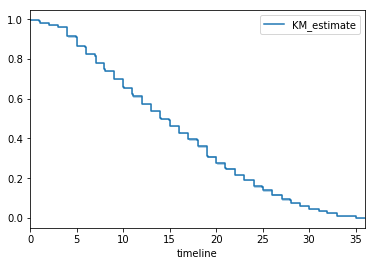

In [21]:
%pylab inline
kmf.plot()

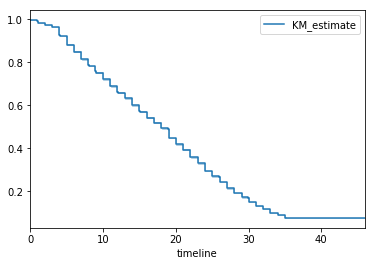

In [23]:
kmf = KaplanMeierFitter()
kmf.fit(data_early_60.duration,data_early_60.label)
kmf.plot()

In [24]:
data.verification_status.unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)